# Prospect Loan Data Visualization
## by Philip Karns

## Preliminary Wrangling

This document explores a dataset from the Prosper loan company, which includes finding trends among variables that include Interest Rate, Loan Amount, and loan status. The dataset contains data for 113,937 loans across 81 variables for each loan.   

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
#look at the first few rows to get an idea of the data we're working with.
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#review data shape
loans.shape

(113937, 81)

In [5]:
#review numerical data
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

There are 113,937 rows and 81 categories. Most variables are numeric.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in determining what variables are best for predicting loan interest rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect ProsperRating(Prosper's level of risk rating), CreditScoreRangeUpper(borrower credit score), and BankcardUtilization (percentage of available credit being utilized) will have the biggest effect on the interest rate of the loans.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: BorrowerRate

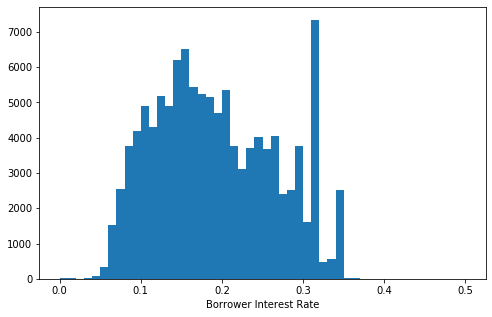

In [6]:
binsize = 0.01
bins = np.arange(0, loans.BorrowerRate.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'BorrowerRate', bins = bins)
plt.xlabel('Borrower Interest Rate');

Borrower Interest Rate is a bimodal distribution, with the first spike at about 15 percent, and the largest spike at about 32%. The majority of the interest rates fall between 10% and 20%. Before and after the largest spike at 32% there's a steep jump and then a steep dropoff, rather than smooth ramping up or down.

Next up, the first predictor variable of interest: ProsperScore

C:\Users\pkarns\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


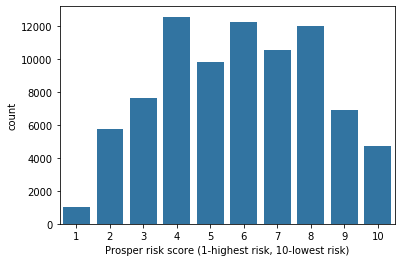

In [7]:
# plotting Prosper Risk Score on a standard scale

#convert data type to ordinal categorical because these are ranked values, not float values
level_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
loan_score_not_null = loans['ProsperScore'] > 0
loans_sub = loans.loc[loan_score_not_null,:]
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
loans_sub['ProsperScore'] = loans_sub['ProsperScore'].astype(ordered_cat)

#plot the data and make all one color
base_color = sb.color_palette()[0]
sb.countplot(data = loans_sub, x = 'ProsperScore', color = base_color);
plt.xlabel('Prosper risk score (1-highest risk, 10-lowest risk)');

The result is a normal distribution, which is expected because the level of risk for each new loan is relative to the risk of other loans. Because of this, the majority of risk scores are in the middle, with fewer risk scores at the extreme ends of the scale. The most common risk score is a 4 which is relatively high risk, followed by 6 and 8, which are less risky scores.

Now we'll look at the distribution for the next predictor variable: Credit Score (CreditScoreRangeUpper)

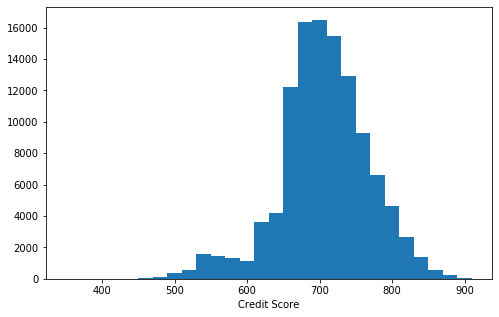

In [8]:
# plotting Credit Score on a standard scale
binsize = 20
bins = np.arange(350, loans['CreditScoreRangeUpper'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'CreditScoreRangeUpper', bins = bins)
plt.xlabel('Credit Score');

We end up with another normally distributed plot, and may correlate with the Prosper Risk Score we evaluated earlier, as the majority of the values fall in the middle of the range, with a peak around 700. We'll look into that possible correlation later. The credit score range differs by various scoring agencies, but is typically within a range of 350-850. Some scoring agencies go as high as 900, which may be why we see some values above 850 here. 

Next let's look at the BankcardUtilization variable, which is the percentage of available revolving credit utilized at time client's profile was pulled for the loan.

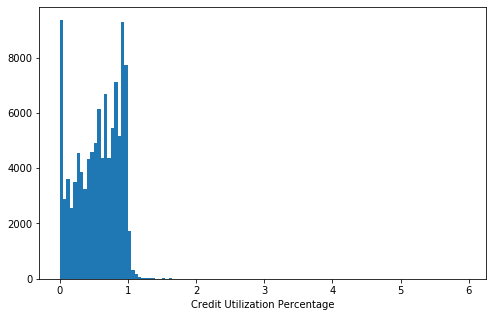

In [9]:
# plotting Credit utilization on a standard scale
binsize = .05
bins = np.arange(0, loans['BankcardUtilization'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'BankcardUtilization', bins = bins)
plt.xlabel('Credit Utilization Percentage');

The initial plot of the Credit Utilization Percentages shows that we appear to have some outliers to the far right of most of our data. It's worth looking into these values to see if they make sense.

In [10]:
#select high outliers for Credit Utilization and compare to their credit scores
high_outliers = loans['BankcardUtilization'] > 2
high_outliers_df = loans.loc[high_outliers,:]
print(high_outliers_df[['CreditScoreRangeUpper', 'BankcardUtilization']])

        CreditScoreRangeUpper  BankcardUtilization
5031                    539.0                 4.73
26151                   699.0                 5.95
32777                   579.0                 2.66
32845                   579.0                 2.36
37107                   579.0                 2.35
53951                   559.0                 2.05
67184                   579.0                 3.47
70752                   559.0                 2.68
71777                   579.0                 5.83
75144                   599.0                 2.46
78628                   679.0                 2.25
86204                   659.0                 2.04
89611                   599.0                 2.27
94925                   619.0                 2.07
100683                  619.0                 2.50
102530                  719.0                 2.23
105762                  579.0                 2.21


We have 17 loans that were provided to clients with a Credit Utilization at the time of the loan above 200% of their available credit. Again, credit scores vary amongst different scoring agencies, but, according to FICO, a 'Very Poor' credit score is considered anything between 300-579, and between 580-669 is considered 'Fair'. 

With such a high utilization of revolving credit, I'd expect to see nearly all of these in the 'Very Poor' range. Many of them are, and some are at the lower end of the 'Fair' range, but many don't appear to make sense, including the credit score of the highest utilized credit of 5.95, which has a corresponding credit score of 699, considered good credit according to FICO.

Because we have some inconsistency with these outliers, for now we'll evaluate the data below the 200% threshold to get a better sense of how the majority of the data is distributed.

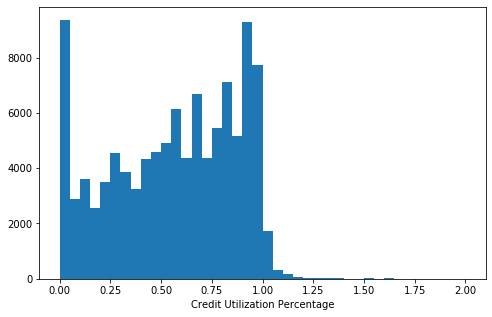

In [11]:
# plotting Credit utilization below 200%
credit_utilization_under2 = loans['BankcardUtilization'] < 2
loans_sub_utilization = loans.loc[credit_utilization_under2,:]

binsize = .05
bins = np.arange(0, loans_sub_utilization['BankcardUtilization'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'BankcardUtilization', bins = bins)
plt.xlabel('Credit Utilization Percentage');

Credit utilization is a multi-modal distribution, with the highest peaks being around zero and .9. More than half of borrowers appear to be utilizing between half and all of their credit, which isn't looked at favorable because a smaller utilization is better for, so it will be interesting to see how this variable affects interest rates. We'll also see whether utilization has an affect on credit scores.

The next thing we'll look at is how many borrowers are home owners, and later we'll see whether this has an affect on interest rates and other variables.

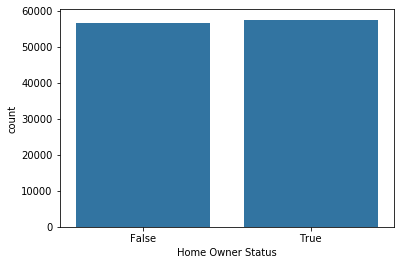

In [12]:
#plotting home ownership status 
base_color = sb.color_palette()[0]
sb.countplot(data = loans, x = 'IsBorrowerHomeowner', color = base_color);
plt.xlabel('Home Owner Status');

Just over half of the borrowers are home owners. Generally speaking, home owners are considered to be more responsible and less risky, so we'll see if that shows in the interest rates and compared to other variables.

The next variable for review is borrower state.

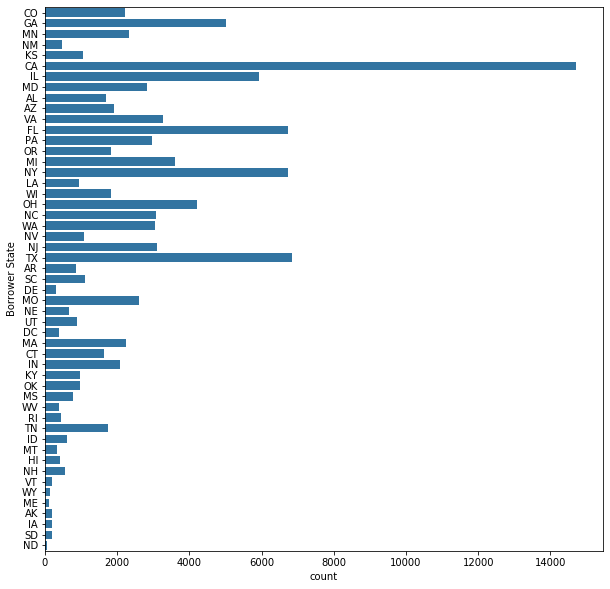

In [13]:
# plotting borrower state
plt.figure(figsize=[10, 10])
base_color = sb.color_palette()[0]
sb.countplot(data = loans, y = 'BorrowerState', color = base_color);
plt.ylabel('Borrower State');

California borrowers have taken out twice as many loans as borrowers from any other state, followed by Florida, New York, and Texas. Later we'll review what these loans are being taken out for to get some insights into why this might be.

Now, let's look at the reasons borrowers are taking out these loans.

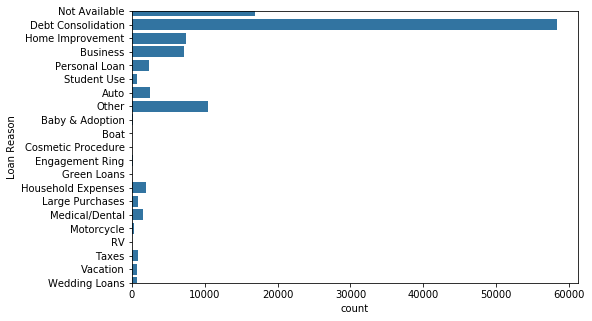

In [14]:
#plotting loan reasons
level_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].astype(ordered_cat)

type_list = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 
'Baby & Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases',
 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']


plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
ax = sb.countplot(data = loans, y = 'ListingCategory (numeric)', color = base_color);

type_list_array = np.array(type_list)
level_order_array = np.array(level_order)

ax.set_yticks(level_order)
ax.set_yticklabels(type_list);

plt.ylabel('Loan Reason');

The overwhelming majority of people are taking out loans for Debt consolidation, with about 5 times as many loans as the 'Other' category, and about 7 times as many loans as Home Improvement or Business. This is a troublesome finding, as it gives some insight into the personal debt many people in the United States are dealing with. Instead of taking out loans for additional purchases, most people are taking out loans to get all of their existing debt into one payment. 

Finally we'll look at Employment Status.

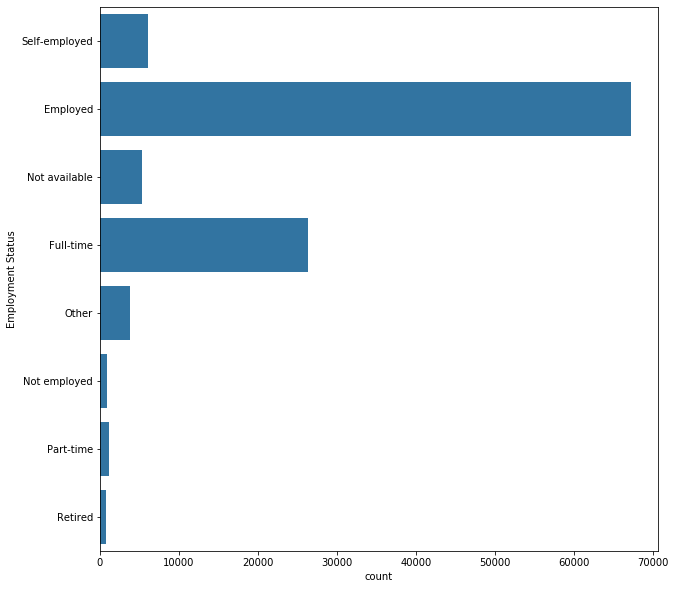

In [15]:
# plotting employment status state
plt.figure(figsize=[10, 10])
base_color = sb.color_palette()[0]
sb.countplot(data = loans, y = 'EmploymentStatus', color = base_color);
plt.ylabel('Employment Status');

The majority of borrowers are employed, but less than half are employed full time. I'd expect full-time workers to have better interest rates, so we'll see if that's the case.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Borrower interest rate was mostly between 10 and 20%, though there was a large spike at around 32%, so it will be interesting to see what factors cause that spike. 

California had the most borrowers by far, and it's known as one of the most expensive states to live in, so we'll look to get more insight into the loans those residents are taking out.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating Credit utilization there were some outliers that didn't make sense, so those points weren't included in the final plot so the majority of the data could be reviewed. 

## Bivariate Exploration

To begin I want to look at the correlations between the features we're evaluating.

In [16]:
numeric_vars = ['BorrowerRate', 'CreditScoreRangeUpper', 'BankcardUtilization']
categoric_vars = ['ProsperScore', 'IsBorrowerHomeowner', 'ListingCategory (numeric)', 'EmploymentStatus']

C:\Users\pkarns\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\pkarns\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\pkarns\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


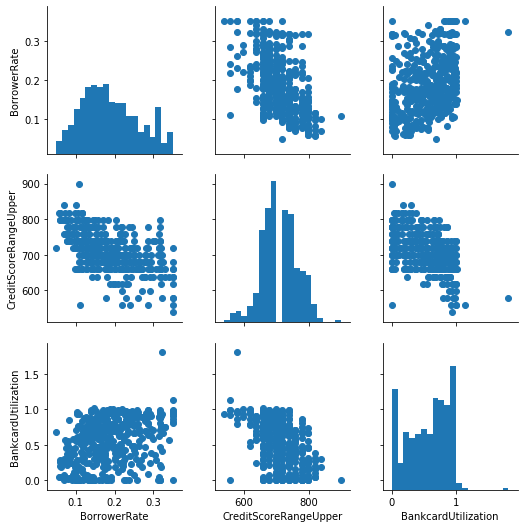

In [17]:
# plot matrix: sample 500 loans
samples = np.random.choice(loans_sub_utilization.shape[0], 500, replace = False)
loans_samp = loans_sub_utilization.loc[samples,:]

g = sb.PairGrid(data = loans_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

There isn't much correlation between borrower interest rate and bank card utilization, which is a bit surprising because ulilizing too much of your available credit is generally looked at negatively. 

As expected, there is a negative correlation between borrower interest rate and Credit score, where borrowers with higher credit scores typically have lower interest rates, and vice versa.

There is a slight negative correlation between credit score and card utilization also, which makes sense because credit scores typically go up and down slightly as credit is used or paid down.

Now we'll look at how the interest rate correlates with our categorical variables.

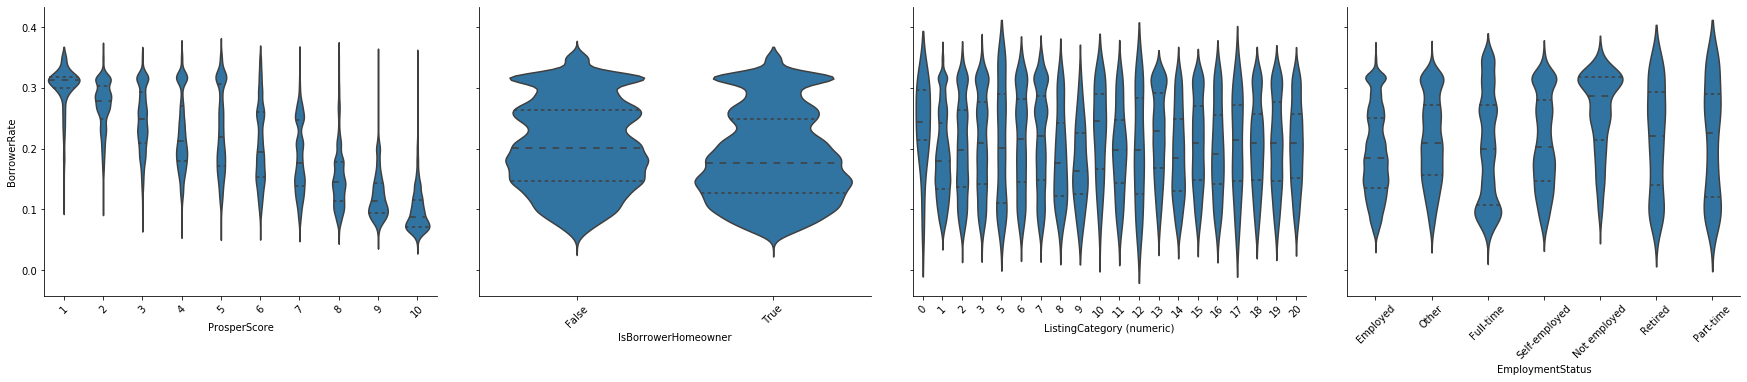

In [18]:
#plot of categorical variables vs interest rate
g = sb.PairGrid(data = loans_sub, x_vars = categoric_vars, y_vars = 'BorrowerRate', height = 4)
g.map(sb.violinplot, inner = 'quartile');
g.fig.set_size_inches(25,5)

g.fig.draw(
    g.fig.canvas.get_renderer()
)
for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

As expected with Prosper Score, it has a direct negative correlation with borrower interest rate. As mentioned above, a lower Prosper score means higher risk, and a higher score means lower risk. We can see in the width of the violin plots that the higher borrower rates are associated with higher risk, and the lower rates are associated with less risk.

We also see some correlation between interest rate and whether or not the borrowers are home owners. Homeowners are more likely to have lower interest rates than non-homeowners. 

Being employed and working full time also result in lower borrower interest rates, while borrowers who aren't employed clearly have higher interest rates than any other group. This is expected, as there's a degree of certainty for full-time workers.

Because the ListingCategory variable doesn't list the titles for each numerical value, we'll discuss that plot below with our labels.

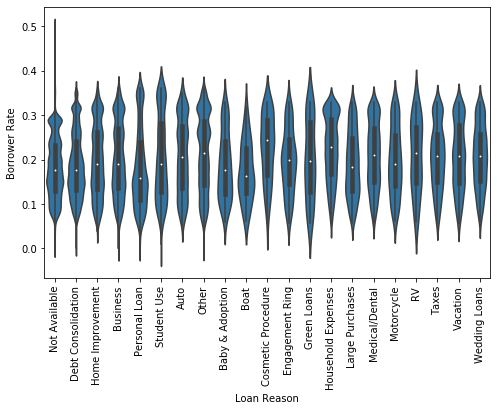

In [19]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
ax = sb.violinplot(data = loans, y = 'BorrowerRate', x = 'ListingCategory (numeric)', color = base_color, height = 20);

type_list_array = np.array(type_list)
level_order_array = np.array(level_order)

ax.set_xticks(level_order)
ax.set_xticklabels(type_list);
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.xlabel('Loan Reason');
plt.ylabel('Borrower Rate');

For Listing Category, which is the reason for the loan, we do see some trends. Loans for household expenses are have a higher proportion of higher interest rates than other categories, while loans for boats, baby & adoption, Personal Loans, and Debt Consolidation are on the lower scale.

Next let's also look at Borrower State, which I separated because the large number of states would be difficult to see on a smaller plot.

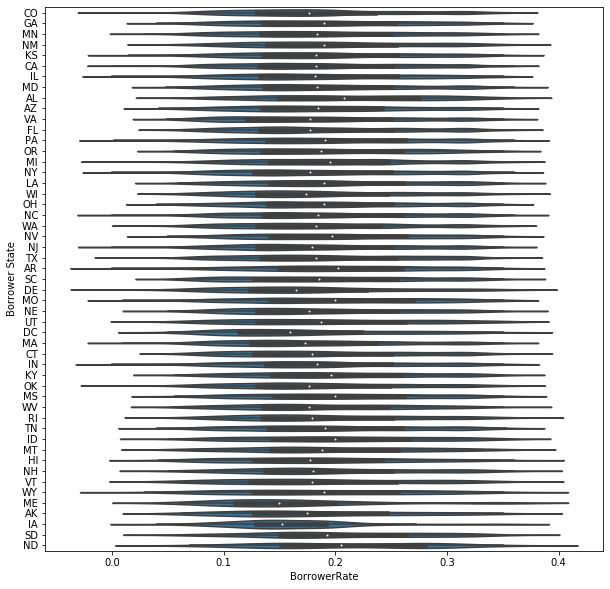

In [20]:
#BorrowerState
plt.figure(figsize=[10, 10])
base_color = sb.color_palette()[0]
sb.violinplot(data = loans, x = 'BorrowerRate', y = 'BorrowerState', color = base_color);
plt.ylabel('Borrower State');

There are some interesting differences among states. Maine and Iowa have the lowest average interest rates, and also a higher proportion of low interest rates. For higher interest rates Alabama and Arkansas top the list on average. 

Now let's look at some correlations amongst some of the categorical variables, starting with Prosper Score.

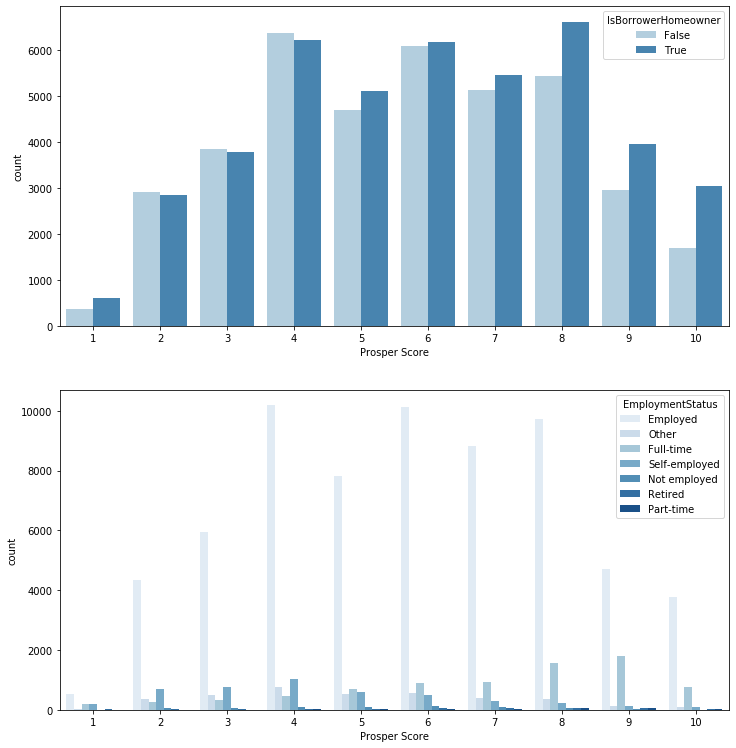

In [21]:
#plotting prosper score vs two other categorical variables
plt.figure(figsize=[12, 20])
# subplot prosper score vs homeowner status
plt.subplot(3, 1, 1)
sb.countplot(data = loans_sub, hue = 'IsBorrowerHomeowner', x = 'ProsperScore', palette = 'Blues');
plt.xlabel('Prosper Score');

# subplot prosper score vs employment status
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loans_sub, hue = 'EmploymentStatus', x = 'ProsperScore', palette = 'Blues');
plt.xlabel('Prosper Score');

Here we looked at prosper score vs two categorical variables: home ownership and employment status. 

For home ownership, on the riskier end of the scale we can see that non-home owners are typically riskier than home owners, while on the high end of the scale with less risk there are clearly more home owners than non-home owners.

While employed borrowers overall are distributed normally, full-time employees are less risky than self-employed or unemployed borrowers.

One other categorical interation I want to review is the state of California and the type of loans the borrowers are taking out. As we saw earlier, California had the majority of loans in our dataset, so it's important to find out what kind of loans they are taking out.

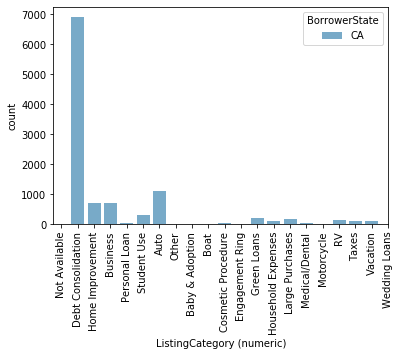

In [22]:
#plot of loans from California
california = loans_sub.query('BorrowerState == "CA"')

ax3 = sb.countplot(data = california, x = 'ListingCategory (numeric)', hue = 'BorrowerState', palette = 'Blues')

ax3.set_xticks(level_order)
ax3.set_xticklabels(type_list);
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=90);

As surmised earlier, Debt Consolidation is far and away the largest loan type for the state of California. Because of California's high cost of living, it appears that is, at least in part, resulting in a lot of debt for the residents of the state.

Now let's look further into the Borrower Interest Rate vs Credit Score relationship further. 

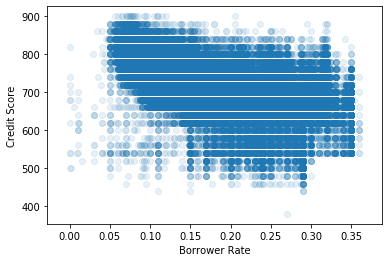

In [23]:
# scatter plot of interest rate vs Credit Score
loans_flag = (loans['CreditScoreRangeUpper'] > 300)
loans_300 = loans.loc[loans_flag,:]

plt.scatter(data = loans_300, x = 'BorrowerRate', y = 'CreditScoreRangeUpper', alpha = 1/10)
plt.xlabel('Borrower Rate')
plt.ylabel('Credit Score');


Having a credit score below 650 almost guarantees that the borrower interest rate will be at least in the 14% range, and even more likely to be above 20%. Most of our values are saturated in the middle, showing that credit scores between 700 and 800 can see any range of interest rate, meaning these borrowers generally have good to great credit, and there are other factors considered that cause borrower rate to fluctuate between 5% and 30%.

Now let's take a closer look at the Borrower Rate and Credit Utilization to see if any other trends appear.

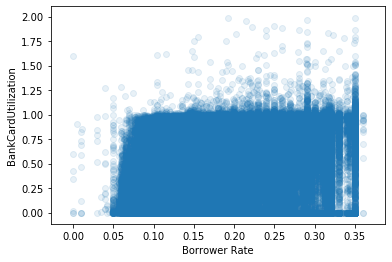

In [24]:
#plot of borrower rate vs bank card utilization
plt.scatter(data = loans_sub_utilization, x = 'BorrowerRate', y = 'BankcardUtilization', alpha = 1/10)
plt.xlabel('Borrower Rate')
plt.ylabel('BankCardUtilization');

What this tells us is that if your credit utilization is anywhere between 0 and 100%, your interest rate could be between 05 and 35%. So not a strong correlation here, though we do see outliers where if credit utilization is above 100%, borrowers are more likely to have interest rates in the higher ranges.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Credit Utilization had a surprisingly low effect on borrower interest rate. Clearly this loan company is more interested in other variables to determine their interest rates and doesn't consider high credit utilization to be very risky.

Home ownership is a significant factor in determining risk, as home owners outpaced non-home owners with the least-risky Prosper risk scores.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The state of California had an extremely high proportion of Debt Consolidation loans. That is concerning for a state with a high cost of living.

There wasn't much correlation between Credit Score and Credit Utiliation. Even those borrowers with high utilization could still have credit scores on the high end. 

## Multivariate Exploration

In this part of the analysis I want to explore how the categorical variables IsBorrowerHomeowner, ProsperScore and ListingCategroy (numeric) relate to the relationship between BorrowerRate and CreditScoreRangeUpper.

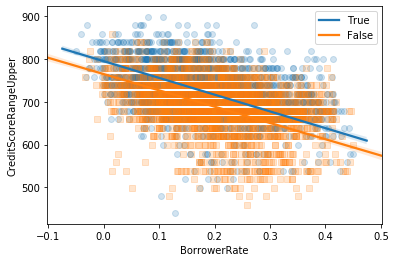

In [25]:
#plot homeowner status vs credit score and interest rate
#sample 500 loans so plots are clearer
loans_flag = (loans['CreditScoreRangeUpper'] > 300)
loans_300 = loans.loc[loans_flag,:]

samples = np.random.choice(loans_300.shape[0], 5000, replace= False)
loans_samp = loans_300.loc[samples,:]

homeowner_status_markers = [[True, 'o'], [False, 's']]

for homeowner_status, marker in homeowner_status_markers:
    loans_status = loans_samp[loans_samp['IsBorrowerHomeowner'] == homeowner_status]
    sb.regplot(data = loans_status, x = 'BorrowerRate', y = 'CreditScoreRangeUpper', marker = marker,
              x_jitter = 0.1, scatter_kws = {'alpha' : 1/5})
plt.legend(['True', 'False']);
#plt.scatter(data = loans_sub_utilization_status, x = 'BorrowerRate', y = 'CreditScoreRangeUpper', marker = marker)

C:\Users\pkarns\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


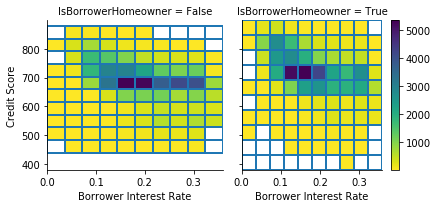

In [26]:
#plot homeowner status vs credit score and interest rate
#get only valid credit scores over 300 and use a heatmap instead
loans_flag = (loans['CreditScoreRangeUpper'] > 300)
loans_300 = loans.loc[loans_flag,:]

g = sb.FacetGrid(data = loans_300, col = 'IsBorrowerHomeowner', size = 3)
g.map(plt.hist2d, 'BorrowerRate', 'CreditScoreRangeUpper', cmin = 0.5, cmap = 'viridis_r');
plt.colorbar()
g.set_xlabels('Borrower Interest Rate')
g.set_ylabels('Credit Score');

A higher number of credit scores for borrowers occurs between 600-700 for both homeowners and non-homeowners, though non-homeowners tend to have more high interest rates between 20-30% within this same range.

Non-homeowners also have a higher amount of scores below 600, while homeowners have more scores above 800. Homeownership itself would not account for such a significant difference. 

Next well review Prosper Score against our numerical data.

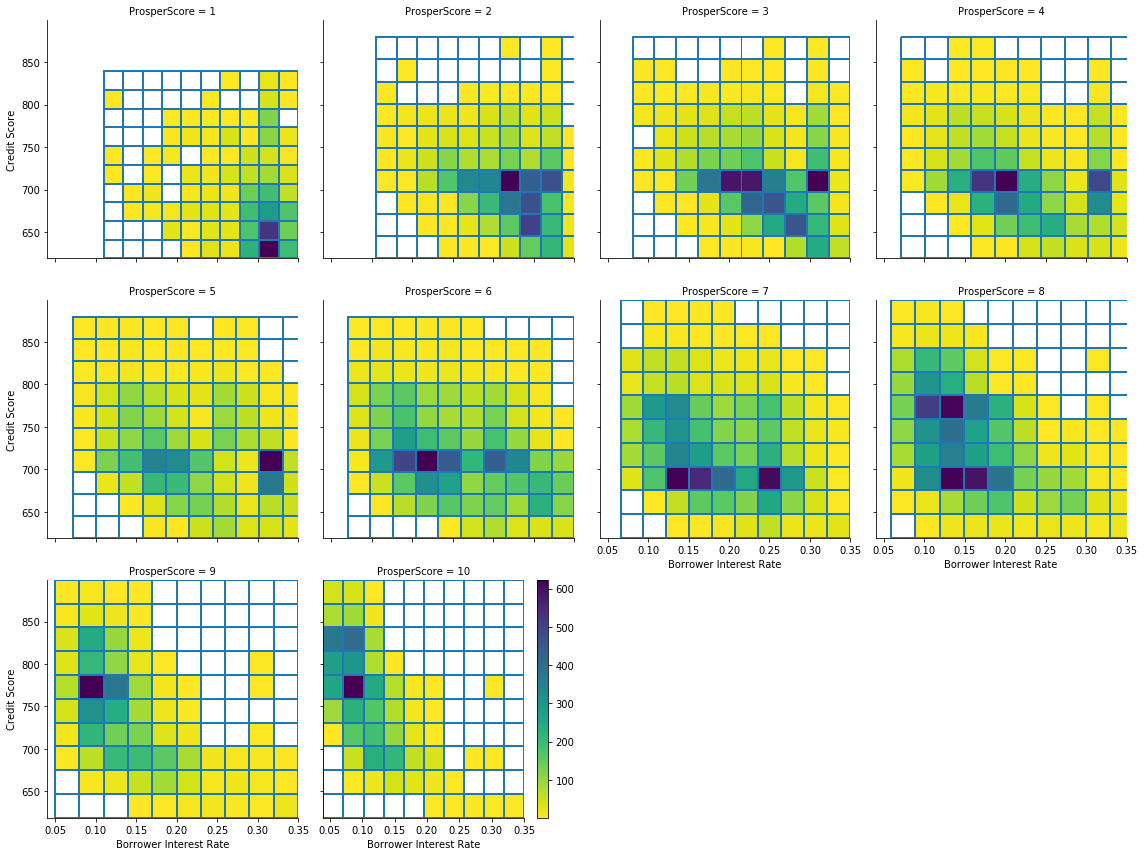

In [27]:
#plot Prosper Score vs credit score and interest rate
g = sb.FacetGrid(data = loans_sub, col = 'ProsperScore', col_wrap = 4, size = 4)
g.map(plt.hist2d, 'BorrowerRate', 'CreditScoreRangeUpper', cmin = 0.5,  cmap = 'viridis_r');
plt.colorbar()
g.set_xlabels('Borrower Interest Rate')
g.set_ylabels('Credit Score');

As prosper score increases (risk lowers) credit scores are higher, and interest rates are lower. Thought at a Prosper Score of 7 there are still a significant number of interest rates above 20%. Prosper Scores of 7 and 8 also have more borrowers with credit scores below 700 than borrowers with riskier scores, yet the interest rates for many of the borrowers with these lower credit scores are lower (in the 12.5% - 17.5% range), than many borrowers with Prospect scores of 5 and below that have higher credit scores. This does make some sense, however, as earlier we determined that credit score had some correlation with borrower interest rates, but it wasn't a high correlation, so there are clearly other significant factors that are considered when a Prosper Score is determined.

Now we'll look at the loan type with our numerical data.

<Figure size 576x360 with 0 Axes>

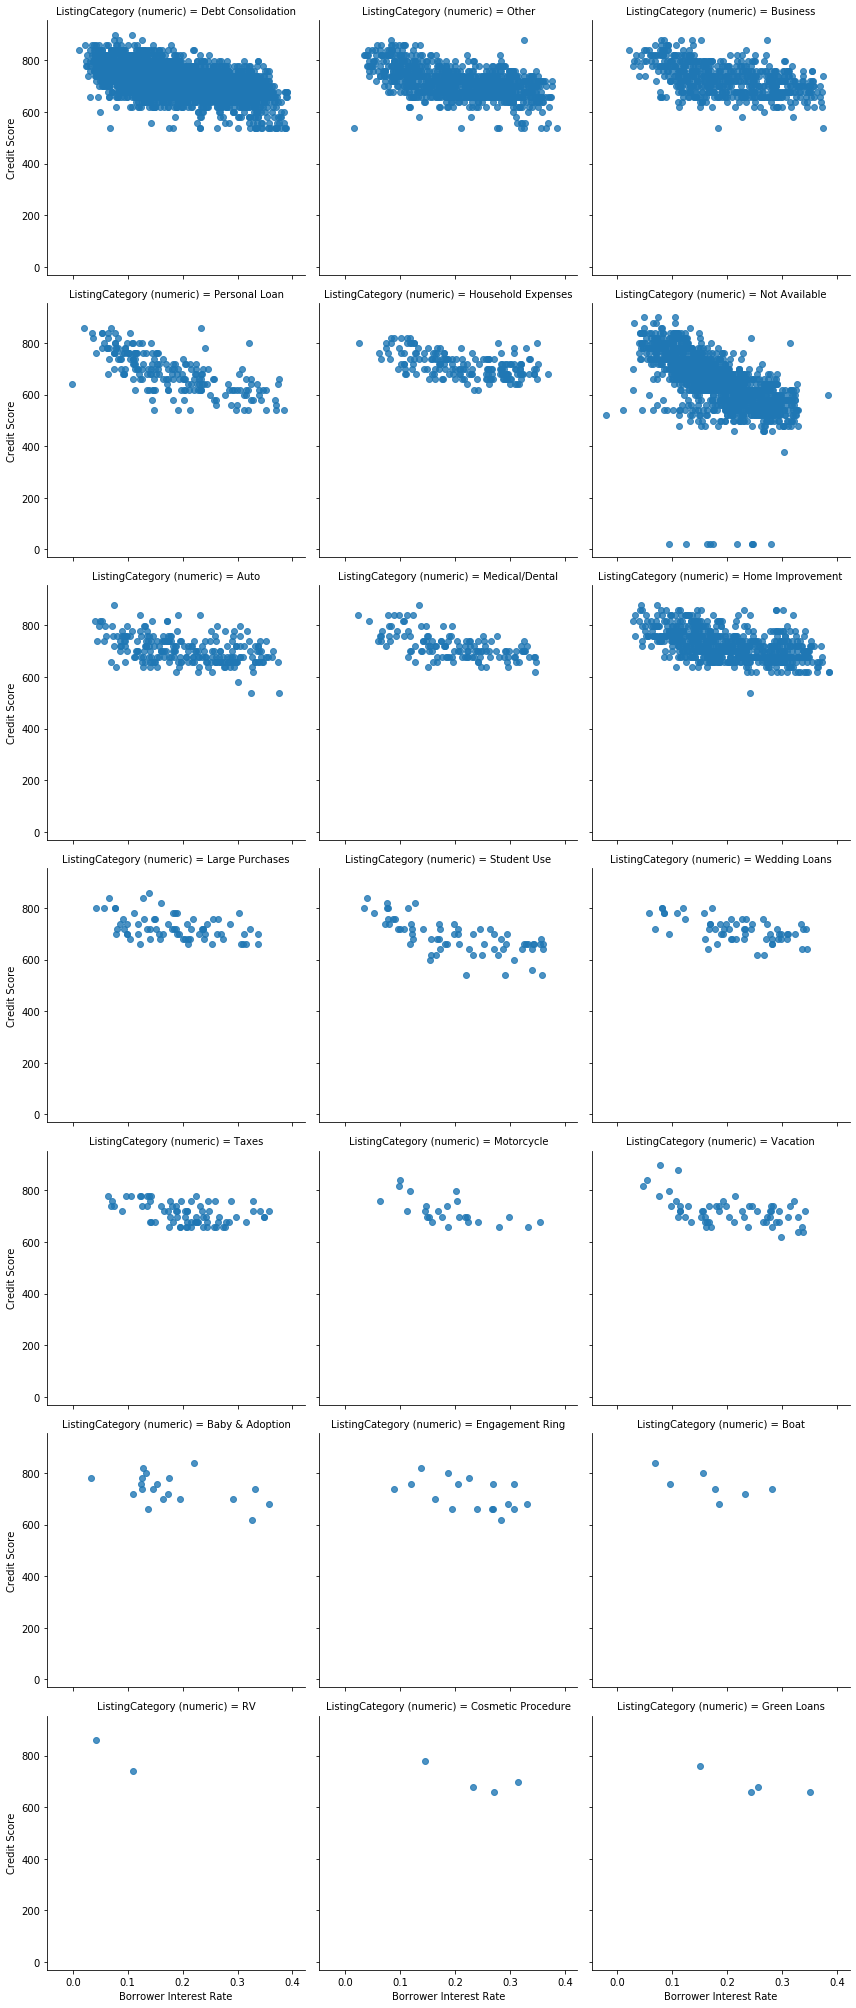

In [28]:
#plot Listing Category (loan type) vs credit score and interest rate
loans_copy = loans.copy()
loans_copy['ListingCategory (numeric)'] = loans_copy['ListingCategory (numeric)'].astype(int)

#use a sample for clarity and so it runs faster
samples = np.random.choice(loans_copy.shape[0], 10000, replace= False)
loans_samp = loans_copy.loc[samples,:]

#update loan categories from to the actual loan type descriptions
for item in loans_samp['ListingCategory (numeric)']:
    loans_samp['ListingCategory (numeric)'].replace(to_replace = item, value = type_list[item], inplace = True)

plt.figure(figsize=[8, 5])
g = sb.FacetGrid(data = loans_samp, col = 'ListingCategory (numeric)', col_wrap = 3, size = 4, margin_titles = True)
g.map(sb.regplot, 'BorrowerRate', 'CreditScoreRangeUpper', x_jitter = 0.04, fit_reg = False);
g.set_xlabels('Borrower Interest Rate')
g.set_ylabels('Credit Score');

In the faceted scatterplot we get an idea of the credit scores and interest rates for borrowers in different loan categories. Debt Consolidation loans are not confined to one group of people. Large numbers of these loans are taken out by people with great credit and low interest rates, as well as by people with poor credit and bad credit scores.

The majority of loans are taken out by people with good to great credit (around 670 and above). Besides debt consolidation loans, the other loan types where borrowers sometimes have poor credit are student, personal, business, and auto.

Finally we'll look at a faceted plot between our two most significant categorical variable and both credit score and interest rate.

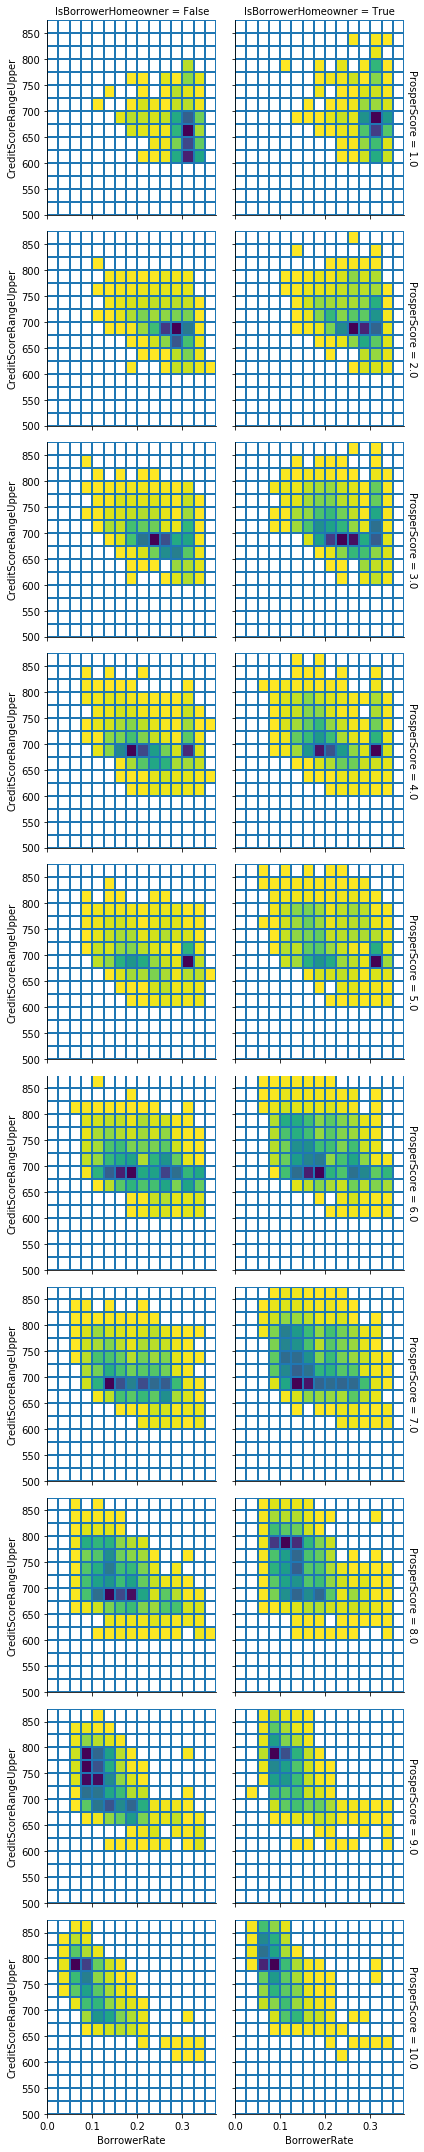

In [30]:
# create faceted heat maps on levels of IsBorrowerHomeowner and ProsperScore
valid_prosper = (loans_300['ProsperScore'] > 0) & (loans_300['ProsperScore'] < 11)
loans_300_val = loans_300.loc[valid_prosper,:]

bins_x = np.arange(0, .35+.05, .025)
bins_y = np.arange(500, 850+50, 25)
g = sb.FacetGrid(data = loans_300_val, col = 'IsBorrowerHomeowner', row = 'ProsperScore',
                 margin_titles = True)
g.map(plt.hist2d, 'BorrowerRate', 'CreditScoreRangeUpper', cmin = 0.5,  cmap = 'viridis_r', bins = [bins_x, bins_y]);

This plot shows that while home ownership has an affect on borrower interest rate and credit score, prosper score has a greater influence. That being said, home ownership is seen as less risky and will generally result in higher credit score and lower interest rates, and it does have some influence on the Prosper Score risk rating.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

IsBorrowerHomeowner, ProsperScore and ListingCategroy (numeric)
In this section I looked at the impact of three categorical variables against the quantitative variables of Credit Score and Borrower Interest Rate. The multivariate exploration showed that being a home owner does have a positive effect on credit score and interest rates on loans, and that borrowers who are home owners also seen as a less risky than non-homeowners.

Risk level has the most significant impact on credit scores and interest rates, and the type of loan being taken out is often done by borrowers within a common credit score range, which affects the ending interest rates. 

### Were there any interesting or surprising interactions between features?

It's interesting that the debt consolidation loan type had not only the largest number of borrowers, but that there were a high number of borrowers with great credit and interest rates. When thinking of debt consolidation, it's easy to think of debt as something that is mainly happening to people who are in financial distress. I think this shows that many people are able to make payments on their debt, but that it is easier for them to consolidate it and have one payment to manage, instead of having multiple payments.